# Permeability-related figures
This notebook reproduces result figures in the paper that came from the distributed diameter cases, with permeability effects only (Figure 6)

In [1]:
# First import the relevant packages and functions
from local_optim_fit import forge_axcaliber, fit_params
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Fit the raw data
We use two custom functions based on dmipy package and scipy to create our forward model -- the two-compartment model (`forge_axcaliber`), and fit the model to simulated data (`fit_params`).

In [2]:
# Create lists to store fitted parameters and fitting costs (squared errors)
costs = []
params = []

# Call the custom function to construct the forward model from interpolating simulated dictionary of intraaxonal signals at different radius values.
forward_model = forge_axcaliber()

# Loop through the relevant permeability values and fit the forward model to the total signal.
for perm in np.arange(0, 0.021, 0.001):
    
    # read the relevant signal file
    simdata = pd.read_csv("./perm_results/signal_MT_0_sus_0_perm_" + '{0:.3f}'.format(perm) + "_rmean_2.00_density_0.65.csv", header=None)
    y = simdata[2].to_numpy()/simdata[2][0] # and calculate the DW attenuation
    
    # Fit the model using the custom function which performs a least square fitting
    cost, param = fit_params(forward_model, y)
    # Store the fitting costs and fitted parameters in the correct lists
    costs.append(cost)
    params.append(param)

To skip fitting parameters from raw data, use the pre-fitted parameters

In [3]:
file_path = "precomputed_perm_params.pickle"
with open(file_path, 'rb') as file:
    params = pickle.load( file)

Read the fixed diameter case parameters for reference

In [4]:
file_path = "../fixed_diameter/precomputed_perm_params.pickle"
with open(file_path, 'rb') as file:
    param_sing = pickle.load( file)
# Extract the estimated diameter (nm_rfit_sing) and volume fraction (nm_vfit_sing) for an underlying diameter=5.4um ((0.3+24*0.1)*2) in fixed diameter case, we'll compare it to the distributed diameter case 
nm_rfit_sing = []
nm_vfit_sing = []
for i in range(21):
    nm_rfit_sing.append(param_sing[i][24]['Nelder-Mead'][2])
    nm_vfit_sing.append(param_sing[i][24]['Nelder-Mead'][0])


### Figure 6a
Plot the fitted diameters across the range of permeability values.

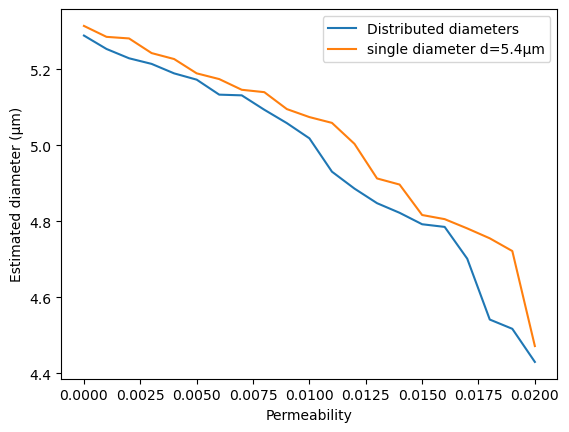

In [5]:
# Create a list to store fitted diameters
nm_rfit = []

# For each permeability value extract the fitted diameter (3rd sub element in the dictionary element)
for a in params:
    nm_rfit.append(a["Nelder-Mead"][2])

# Plot the fitted diameters across all permeability values
plt.plot(np.arange(0, 0.021, 0.001),np.array(nm_rfit)*2, label="Distributed diameters")
# Plot the fixed diameter case across all permeability values for reference
plt.plot(np.arange(0, 0.021, 0.001),np.array(nm_rfit_sing)*2, label="single diameter d=5.4μm")
plt.xlabel("Permeability")
plt.ylabel("Estimated diameter (μm)")
plt.legend()
plt.show()


### Figure 6b
Plot the fitted volume fractions across the range of permeability values

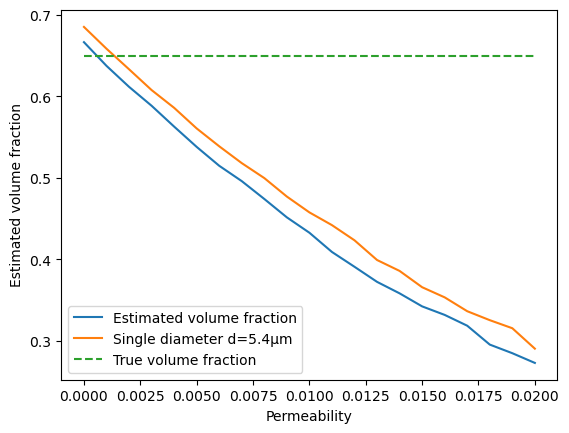

In [6]:
# Create a list to store fitted diameters
nm_vfit = []

# For each permeability value extract the fitted volume fraction (1st sub element in the dictionary element)
for a in params:
    nm_vfit.append(a["Nelder-Mead"][0])

# Plot the fitted volume fractions across all permeability values
plt.plot(np.arange(0, 0.021, 0.001),np.array(nm_vfit), label="Estimated volume fraction")
# Plot the fixed diameter case across all permeability values for reference
plt.plot(np.arange(0, 0.021, 0.001),np.array(nm_vfit_sing), label="Single diameter d=5.4μm")
# Plot the true underlying volume fraction 
plt.plot([0,0.02],[0.65,0.65], label="True volume fraction", linestyle="--")
plt.xlabel("Permeability")
plt.ylabel("Estimated volume fraction")
plt.legend(loc='lower left')
plt.show()
